In [1]:
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sns

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [2]:
customers = pd.read_csv("dataset/quiz.csv")

**Check the head of customers, and check out its describe()

In [3]:
customers.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,NaN,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,496.000000,497.000000,497.000000,498.000000,499.000000
mean,33.052950,12.052674,37.060539,3.533548,499.314387
std,0.996552,0.997215,1.013539,1.001282,79.394375
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.338172,11.386776,36.339521,2.928110,445.014369
50%,33.078224,11.979061,37.073616,3.533975,498.635599
75%,33.716374,12.759169,37.717771,4.128337,549.496082
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg_Session_Length      496 non-null float64
Time_on_App             497 non-null float64
Time_on_Website         497 non-null float64
Length_of_Membership    498 non-null float64
Yearly_Amount_Spent     499 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## 1. Data Preprocessing
Clean the data / Fill in the missing data

Find out which columns have missing data & use the mean to fill in the missing data

In [6]:
from sklearn.preprocessing import Imputer
cat_cols = ['Email', 'Address', 'Avatar']
num_cols = ['Avg_Session_Length', 'Time_on_App', 'Time_on_Website', 'Length_of_Membership', 'Yearly_Amount_Spent']

num_customers = customers.drop(columns=cat_cols, axis=1)
imputer = Imputer(strategy = 'mean')
num_customers = imputer.fit_transform(num_customers)
num_customers = pd.DataFrame(num_customers, columns=num_cols)

num_customers.describe()

/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.052950,12.052674,37.060539,3.533548,499.314387
std,0.992550,0.994213,1.010488,0.999273,79.314781
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.076119,11.983231,37.069367,3.533548,498.974993
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
customers.describe()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,496.000000,497.000000,497.000000,498.000000,499.000000
mean,33.052950,12.052674,37.060539,3.533548,499.314387
std,0.996552,0.997215,1.013539,1.001282,79.394375
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.338172,11.386776,36.339521,2.928110,445.014369
50%,33.078224,11.979061,37.073616,3.533975,498.635599
75%,33.716374,12.759169,37.717771,4.128337,549.496082
max,36.139662,15.126994,40.005182,6.922689,765.518462


Compare imputed dataset with the original one

**Use Heatmap to check correlation**

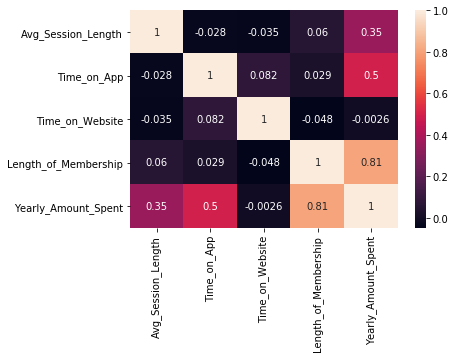

In [8]:
sns.heatmap(num_customers.corr(), annot=True)

**Based off this heatmap what looks to be the most correlated feature with Yearly Amount Spent?**

Lenght_of_Membership has the strongest positive linear relationship with Yearly_Amount_Spent

**----------------------------------------------------------------------------------------------------------------------------**

## 2. Data Visualization

**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [9]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

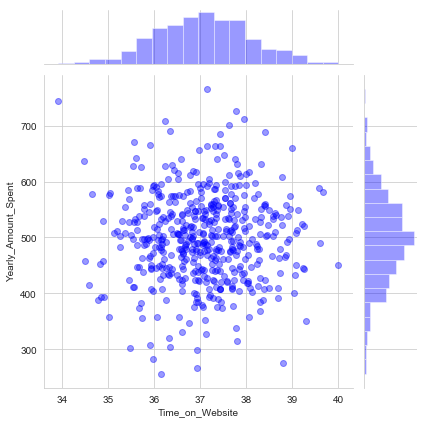

In [10]:
sns.jointplot(x= num_customers['Time_on_Website'], y=num_customers['Yearly_Amount_Spent'], alpha=0.4, color='b')

This plot is reasonable becuase according to correation matrix above suggests that Time_on_Website has a weak linear correlation with Yearly_Amount_Spent

**Do the same but with the Time on App column instead.**

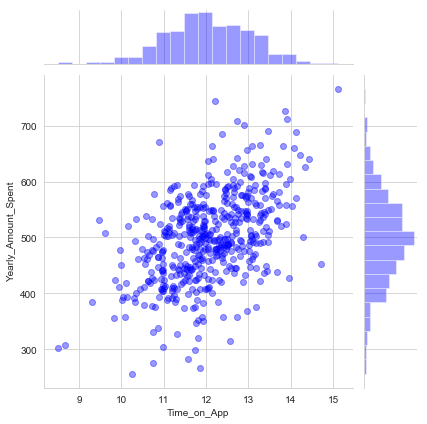

In [11]:
sns.jointplot(x= num_customers['Time_on_App'], y=num_customers['Yearly_Amount_Spent'], alpha=0.4, color='b')

**Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

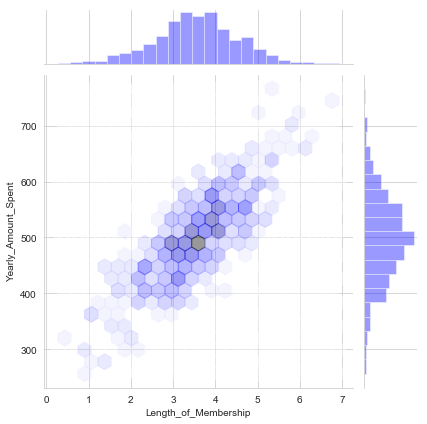

In [12]:
sns.jointplot(x= num_customers['Length_of_Membership'], y=num_customers['Yearly_Amount_Spent'],kind='hex', alpha=0.4, color='b')

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

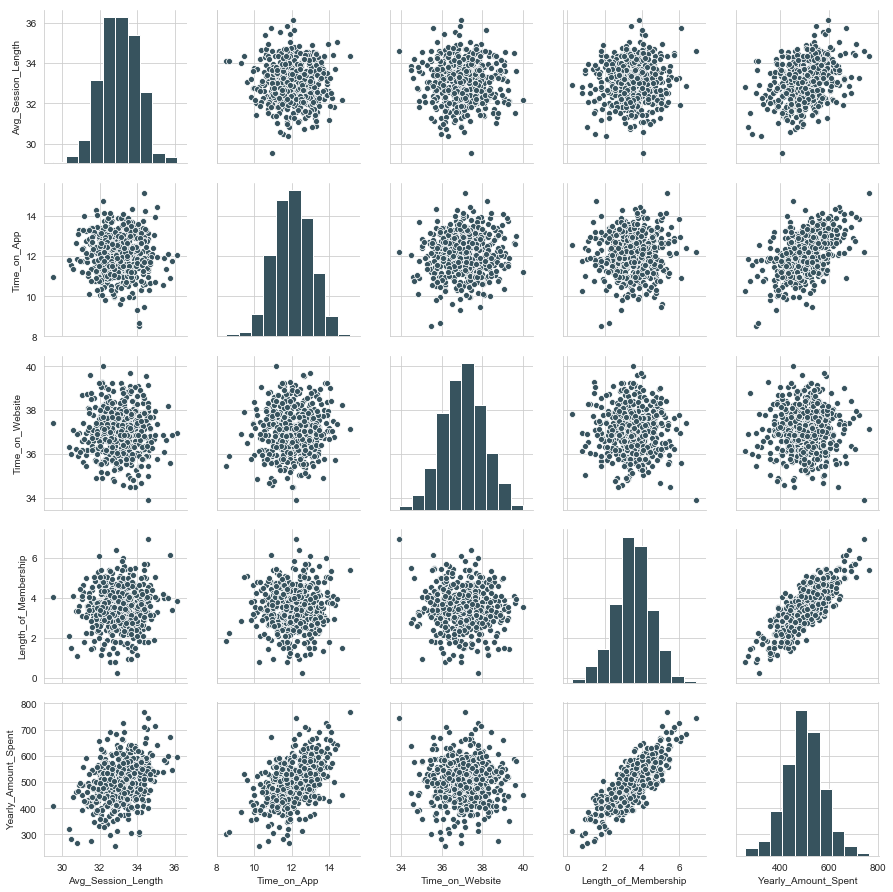

In [13]:
sns.pairplot(num_customers, )

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership.**

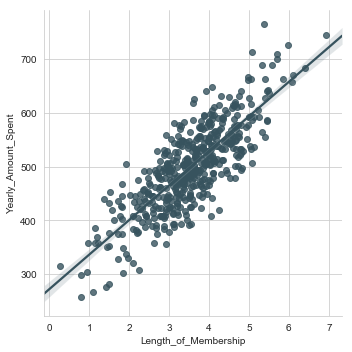

In [14]:
sns.lmplot(data = num_customers,x='Length_of_Membership',y='Yearly_Amount_Spent')

**----------------------------------------------------------------------------------------------------------------------------**

## 3. Data Modeling
Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
**Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.**

In [15]:
X = num_customers.drop(['Yearly_Amount_Spent'], axis=1)
y = num_customers['Yearly_Amount_Spent']

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 3.1 Training the Model

Now its time to train our model on our training data!

**Import LinearRegression library**

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as smf
from scipy import stats

**Create an instance of a LinearRegression() model named lm.**

In [18]:
lm = smf.ols(formula='Yearly_Amount_Spent ~ Avg_Session_Length + Time_on_App + Time_on_Website + Length_of_Membership', data=num_customers).fit()

**Check fitted model summary & use p-value criteria to do feature selection**

In [19]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly_Amount_Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     7739.
Date:                 Thu, 15 Nov 2018   Prob (F-statistic):               0.00
Time:                         16:54:03   Log-Likelihood:                -1857.8
No. Observations:                  500   AIC:                             3726.
Df Residuals:                      495   BIC:                             3747.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1051.9716     23.031    -45.677      0.000   -1097.222   -1006.721
Avg_Session_Length      25.7226      0.452     56.932      0.000      24.835      26.610
Time_on_App             38.7154      0.452     85.694      0.000      37.828      39.603
Time_on_Website          0.4549      0.445      1.023      0.307      -0.419       1.329
Length_of_Membership    61.5799      0.449    137.111      0.000      60.697      62.462
==============================================================================
Omnibus:                        0.309   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.857   Jarque-Bera (JB):                0.180
Skew:                          -0.028   Prob(JB):                        0.914
Kurtosis:                       3.073   Cond. No.                     2.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 3.2 Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

**Use lm.predict() to predict off the X_test set of the data.**

In [20]:
y_pred = lm.predict(X_test)

**Create a scatterplot of the real test values versus the predicted values.**

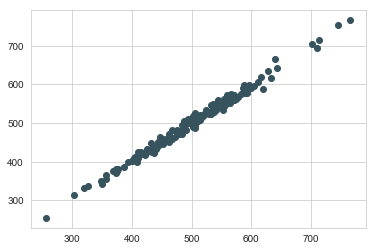

In [21]:
plt.scatter(x=y_test, y=y_pred)

## 3.3 Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

**Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [22]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 7.222837757391399
MSE: 79.64868075414876
RMSE: 8.924610958139786


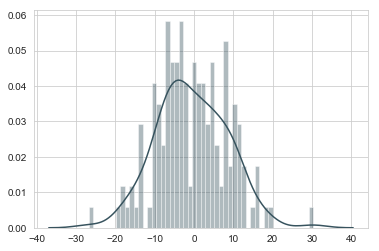

In [23]:
sns.distplot((y_test-y_pred),bins=50)
plt.show()

**----------------------------------------------------------------------------------------------------------------------------**

## 4. Conclusion
We still want to figure out the answer to the original question, do we focus our efforts on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

**Print out the coefficients of the model**

In [24]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly_Amount_Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     7739.
Date:                 Thu, 15 Nov 2018   Prob (F-statistic):               0.00
Time:                         16:54:04   Log-Likelihood:                -1857.8
No. Observations:                  500   AIC:                             3726.
Df Residuals:                      495   BIC:                             3747.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1051.9716     23.031    -45.677      0.000   -1097.222   -1006.721
Avg_Session_Length      25.7226      0.452     56.932      0.000      24.835      26.610
Time_on_App             38.7154      0.452     85.694      0.000      37.828      39.603
Time_on_Website          0.4549      0.445      1.023      0.307      -0.419       1.329
Length_of_Membership    61.5799      0.449    137.111      0.000      60.697      62.462
==============================================================================
Omnibus:                        0.309   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.857   Jarque-Bera (JB):                0.180
Skew:                          -0.028   Prob(JB):                        0.914
Kurtosis:                       3.073   Cond. No.                     2.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**How can you interpret these coefficients?**

Based on p-value of both Time_on_App and Time_on_Website, we can conclude that Time_on_Website is less significant to predict Yearly_Amount_Spent

And also, The coefficient value of Time_on_App are greater than Time_on_Website which means Time_on_App has more effect on values of Yearly_Amount_Spent

if Time_on_App increase 1 unit then Yearly_Amount_Spent will increase 38.7154 units.
but Time_on_Website increase 1 unit then Yearly_Amount_Spent will increase 0.4549 units

**Do you think the company should focus more on their mobile app or on their website?**

Mobile App

## ----- End Of Quiz -----